# Think Stats

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import rv_discrete

EDGE = 32

xs = [0] * 100

for idx_x in range(100):
    arr = np.zeros([EDGE**2])
    
    for idx, v in enumerate(arr):
        i = math.floor(idx / EDGE)
        j = idx % EDGE
        arr[i * EDGE + j] = i + j + np.random.normal() * EDGE / 10
    
    xs[idx_x] = arr

xs = np.array(xs)

/Users/yahata/.pyenv/versions/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


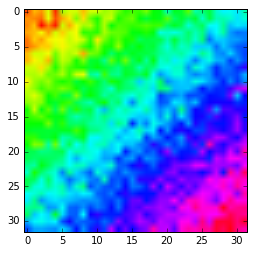

In [86]:
plt.imshow(xs[1].reshape([-1, EDGE]), cmap="hsv")
plt.show()

In [87]:
ys = [0] * 100
OFFSET = 20

for idx_y, arr in enumerate(ys):
    arr2 = np.zeros([EDGE**2])
    
    for idx, v in enumerate(arr2):
        i = math.floor(idx / EDGE)
        j = idx % EDGE
        arr2[i * EDGE + j] = xs[idx_y][((i -OFFSET)%EDGE) * EDGE + ((j - OFFSET)%EDGE)]
    
    ys[idx_y] = arr2

/Users/yahata/.pyenv/versions/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


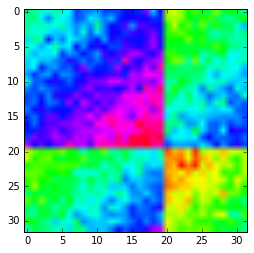

In [88]:
plt.imshow(ys[1].reshape([-1, EDGE]), cmap="hsv")
plt.show()

In [89]:
import tensorflow as tf

"""
x = tf.placeholder("float", [None, 100])

W = tf.Variable(tf.zeros( [100, 100]))
b = tf.Variable(tf.zeros([100]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder("float", [None, 100])
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

learning_rate = 0.01
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
"""

def inference(input_placeholder, keep_prob):
    W_conv1 = tf.Variable(tf.zeros([2, 2, 1, EDGE]))
    b_conv1 = tf.Variable(tf.zeros([EDGE]))

    x_image = tf.reshape(input_placeholder, [-1, EDGE, EDGE, 1])  # 2: width, 3: height, 4: color channel

    h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)  # conv
    h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  # max pooling

    W_conv2 = tf.Variable(tf.zeros([2, 2, EDGE, 64]))
    b_conv2 = tf.Variable(tf.zeros([64]))

    h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
    h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    W_fc1 = tf.Variable(tf.zeros([8 * 8 * 64, 1024]))
    b_fc1 = tf.Variable(tf.zeros([1024]))

    h_pool2_flat = tf.reshape(h_pool2, [-1, 8 * 8 * 64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    W_fc2 = tf.Variable(tf.zeros([1024, EDGE**2]))
    b_fc2 = tf.Variable(tf.zeros([EDGE**2]))

    y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)  # output layer

    return y_conv

def loss(output, supervisor_labels_placeholder):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(supervisor_labels_placeholder * tf.log(output), reduction_indices=[1]))
    return cross_entropy

x = tf.placeholder("float", [None, EDGE**2])
y = inference(x, 0.5)

y_ = tf.placeholder("float", [None, EDGE**2])
cross_entropy = loss(y, y_)

learning_rate = 0.01
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

init = tf.initialize_all_variables()

In [90]:
sess = tf.InteractiveSession()

sess.run(init)

217517.0
217506.0
217495.0
217486.0
217476.0
217467.0
217458.0
217449.0
217441.0
217433.0
217425.0
217418.0
217411.0
217404.0
217397.0
217391.0
217384.0
217378.0
217372.0
217367.0
217361.0
217356.0
217351.0
217346.0
217341.0
217336.0
217332.0
217327.0
217323.0
217319.0
217315.0
217311.0
217307.0
217304.0
217300.0
217297.0
217293.0
217290.0
217287.0
217284.0
217281.0
217278.0
217275.0
217272.0
217269.0
217267.0
217264.0
217262.0
217259.0
217257.0
217255.0
217252.0
217250.0
217248.0
217246.0
217244.0
217242.0
217240.0
217238.0
217236.0
217234.0
217233.0
217231.0
217229.0
217228.0
217226.0
217224.0
217223.0
217221.0
217220.0
217218.0
217217.0
217216.0
217214.0
217213.0
217212.0
217210.0
217209.0
217208.0
217207.0
217205.0
217204.0
217203.0
217202.0
217201.0
217200.0
217199.0
217198.0
217197.0
217196.0
217195.0
217194.0
217193.0
217192.0
217191.0
217190.0
217189.0
217189.0
217188.0
217187.0


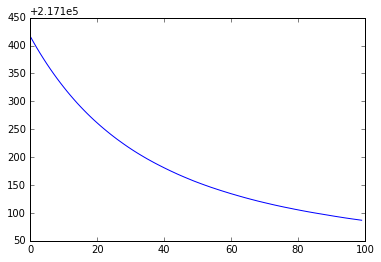

In [100]:
import random

ces = []

for i in range(100):
    batch_xs = random.sample(xs, 20)
    batch_ys = random.sample(ys, 20)
    sess.run(train_step, feed_dict={ x: batch_xs, y_: batch_ys })
    
    ce = cross_entropy.eval(feed_dict={ x: xs, y_: ys })
    ces.append(ce)
    
    if i % 10 == 0:
        print(ce)

plt.plot(ces)
plt.show()

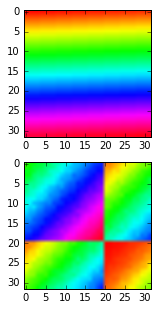

In [101]:
test_xs = [np.arange(EDGE**2)]
result = y.eval(feed_dict={ x: test_xs })

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(2, 1, 1)
ax1.imshow(test_xs[0].reshape([-1, EDGE]), cmap="hsv")

ax2 = fig.add_subplot(2, 1, 2)
ax2.imshow(result.reshape([-1, EDGE]), cmap="hsv")

plt.show()